## Forward Propagation and Activation Functions

This notebookk will cover how forward progrations required activations function to produce useful outputs for our neural network to use.

The class LayerDense will create the code seen in Neural Network Foundations for any number of features in a dataset to be fed in to the layer and any number of neurons to be used for the layer. For example, an dataset that has 5 features ([1,2,3,4,5]) can be inputed to a layer that used 3 neurons.

The values of weights for the neurons in the layer object will be randomised and the biases will be set to zero. The weights is determined by a Gaussian distribution with a mean of 0 and a variance of 1 using the random.randn function.

In [39]:
# Import numpy for array handling
import numpy as np

# Create a neural network layer of n_neurons using n_inputs.
class LayerDense:
    # Initialise weights and biases
    def __init__(self, n_inputs,n_neurons):       
        self.weights = 0.01 * np.random.randn(n_neurons, n_inputs)
        self.biases = np.zeros((1, n_neurons))
    
    # Method to caluclate the output of the layer object
    def forward(self, inputs):
        # Calculate output values from the inputs, weights and biases
        self.output = np.dot(inputs, self.weights.T) + self.biases
        
# Test class. The input will have 4 features
X = [[1,2,3,4],
    [2,3,5,4],
    [4,2,2,-4]]

# Initialise class to have 3 neurons and use X features as the number of inputs
first_layer = LayerDense(4,3)
# Initiate forward propagation step
first_layer.forward(X)
print(first_layer.output)

[[ 0.11973768  0.00543792 -0.01558975]
 [ 0.13338469  0.00683051 -0.02777187]
 [-0.08364256 -0.00392355 -0.00222725]]


Before calculating the output, a step activation function must be applied to inputs. The class ActivationRelu below, uses the rectified linear activation function as the activation function.

In [40]:
# Rectified linear activation class
class ActivationReLU:
    def activate(self, inputs):
        # If input is greater than 0 return input else return 0
        self.output = np.maximum(0, inputs)

For the outer layer, a different activation function will need to be used compared to the hidden layers. This will produce a probability distrubution as the output for the output layer. The class ActivationSoftmax below, achieves this.

![softmax formular](https://lh6.googleusercontent.com/3vcfJ5hJhsMZAMFIbQOEycfVW1t6rh1CXt62DeMk8RPPXVzV4vCcURNm_z_F7618uAeSHT7qT7wE_UiK5Ic0b-Eeuunn6iTGeHWbpAaUAP6-G2ePubeGWCb4_TmSapeaimZqvuUs)

In [41]:
# Softmax activation class
class ActivationSoftmax:
    def activate(self, inputs):
        # Exponentiate input values. The inputs will be subrstracted by the max value of inputs to prevent overflow.
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims= True))
        # Normalise the values
        probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
        self.output = probabilities

To the test the classes, a spiral dataset will be used: It has two features as the input and has 3 classes of data i.e the output layer will have three neurons. The function below is used to generate this dataset.

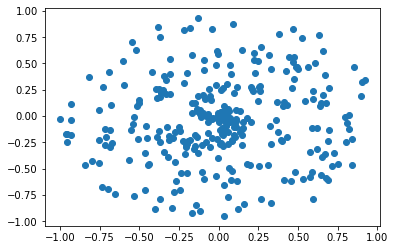

In [42]:
# Function to generate spiral dataset
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

# Import module to plot graph
import matplotlib.pyplot as plt

# Create dataset with 3 classes annd 100 samples. This would be the input layer
X, y = spiral_data(100, 3)

# Use data to plot graph
plt.scatter(X[:, 0], X[:, 1])
plt.show()

The below code is now testing the classes to see if an output layer of values will be produced. It is expected to produce 3 values of a probability distribution per sample. 

In [43]:
# Create the first hidden layer
hidden_layer = LayerDense(2, 3)
# Create a ReLU activation object
ReLU = ActivationReLU()
# Create the output layer. It will have three neurons as there are 3 classes.
output_layer = LayerDense(3, 3)
# Create a softmax activation object
softmax = ActivationSoftmax()

# Initiate hidden layer propagation step with the spiral data
hidden_layer.forward(X)
# Parse the output of the hidden_layer to the ReLU activate function
ReLU.activate(hidden_layer.output)
# Initiate output layer with the activated hidden layer output values
output_layer.forward(ReLU.output)
# Parse the output layer values to the softmax activate function
softmax.activate(output_layer.output)

# Print output layer values
print(softmax.output)

[[0.33333333 0.33333333 0.33333333]
 [0.33333294 0.33333352 0.33333355]
 [0.33333294 0.33333352 0.33333354]
 [0.33333222 0.33333385 0.33333393]
 [0.33333231 0.33333381 0.33333388]
 [0.33333333 0.33333333 0.33333333]
 [0.33333231 0.33333381 0.33333388]
 [0.33333333 0.33333333 0.33333333]
 [0.33333286 0.33333355 0.33333359]
 [0.33333188 0.33333401 0.33333411]
 [0.33333062 0.33333459 0.33333479]
 [0.33333333 0.33333333 0.33333333]
 [0.33333329 0.33333335 0.33333335]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.3333326  0.33333295 0.33333445]
 [0.33333333 0.33333333 0.33333333]
 [0.33333235 0.33333309 0.33333456]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333272 0.33333264 0.33333464]
 [0.33333333 0.33333333 0.33333333]
 [0.33333259 0.33333249 0.33333492]
 [0.33333302 0.33333298 0.333334  ]
 [0.33333227 0.33333259 0.33333514]
 [0.33333222 0.33333256 0.33333521]
 [0.33333133 0.33333386 0.33333481]
 [0.33333194 0.33333273 0.33

The output layer produced a even probabiltity distribution, because the model has not be trained through backward propagation and the weights and biases of the neurons were initialised at random.